# Yapay Sinir Ağları ile Rakam Tanıma
* İş problemi (El yazısı hatayı tanımlama)
* Veriyi anlamak (Veriyi anlamaya çalışacağız)
* Veriyi Hazırlamak (Veri Hazırlama)
* Modelleme (Modelleyeceğiz)
* Değelendirme (Evaluation)

## iş problemi
problem : İnsan gücü kaynağını daha verimli kullanabilir miyiz ?

In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical, plot_model

In [4]:
import matplotlib.pyplot as plt
import numpy as np

data load

In [86]:
(x_train,y_train), (x_test,y_test) = mnist.load_data()

In [87]:
x_train.shape

(60000, 28, 28)

In [11]:
y_train.shape

(60000,)

In [13]:
x_test.shape

(10000, 28, 28)

In [15]:
y_test.shape

(10000,)

In [16]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [17]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [18]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [20]:
num_labels = len(np.unique(y_train))

# veri setinden örnekler gösterilmesi

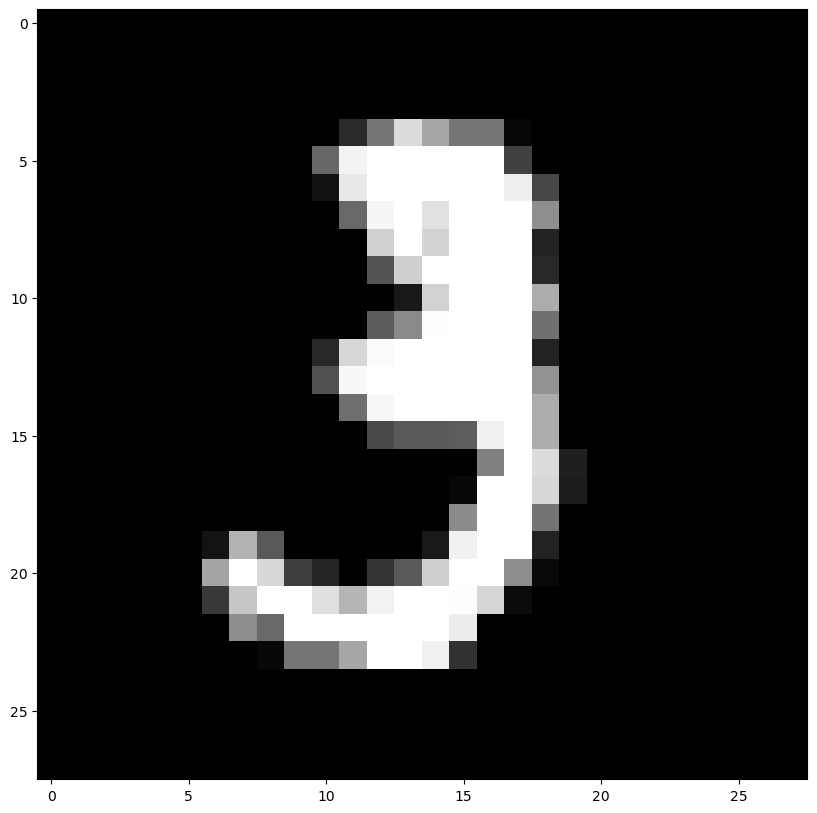

In [31]:
plt.figure(figsize=(10,10))
plt.imshow(x_train[10], cmap='gray')

In [54]:
def visualize_img(data,rng):
    plt.figure(figsize=(10,10))
    for n in range(rng):
        ax = plt.subplot(5,5,n+1)
        plt.imshow(data[n], cmap='gray')


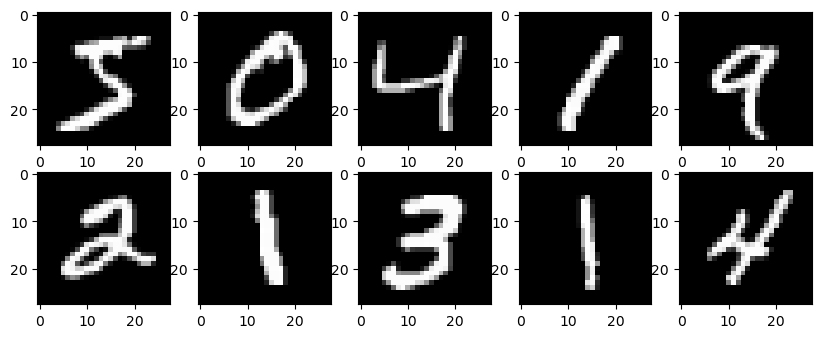

In [55]:
visualize_img(x_train,10)

* bir bilgisayar renk göstermek istediğinde rgb kullannır, kırmızı yeşil mavi, . 
* rgb (0-255)
* r:250    g:0        b:250

In [51]:
x_train[2].shape

(28, 28)

In [52]:
x_train.shape

(60000, 28, 28)

In [56]:
x_train[2][14,10]

49

In [60]:
x_train[2].mean()

24.799744897959183

In [66]:
x_train[2][14:20 , 10:20]

array([[ 49, 116, 144, 150, 241, 243, 234, 179, 241, 252],
       [254, 250, 240, 198, 143,  91,  28,   5, 233, 250],
       [ 98,  56,   0,   0,   0,   0,   0, 102, 254, 220],
       [  0,   0,   0,   0,   0,   0,   0, 169, 254, 137],
       [  0,   0,   0,   0,   0,   0,   0, 169, 254,  57],
       [  0,   0,   0,   0,   0,   0,   0, 169, 254,  57]], dtype=uint8)

In [67]:
x_train[2][14:20 , 10:20].mean()

96.51666666666667

In [73]:
def pixel_visualize(img):
    fig = plt.figure(figsize=(12,12))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')
    width,height =img.shape
    threshhold = img.max() /2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y], 2)), xy=(y,x),
                      color='white' if img[x][y]< threshhold else 'black')

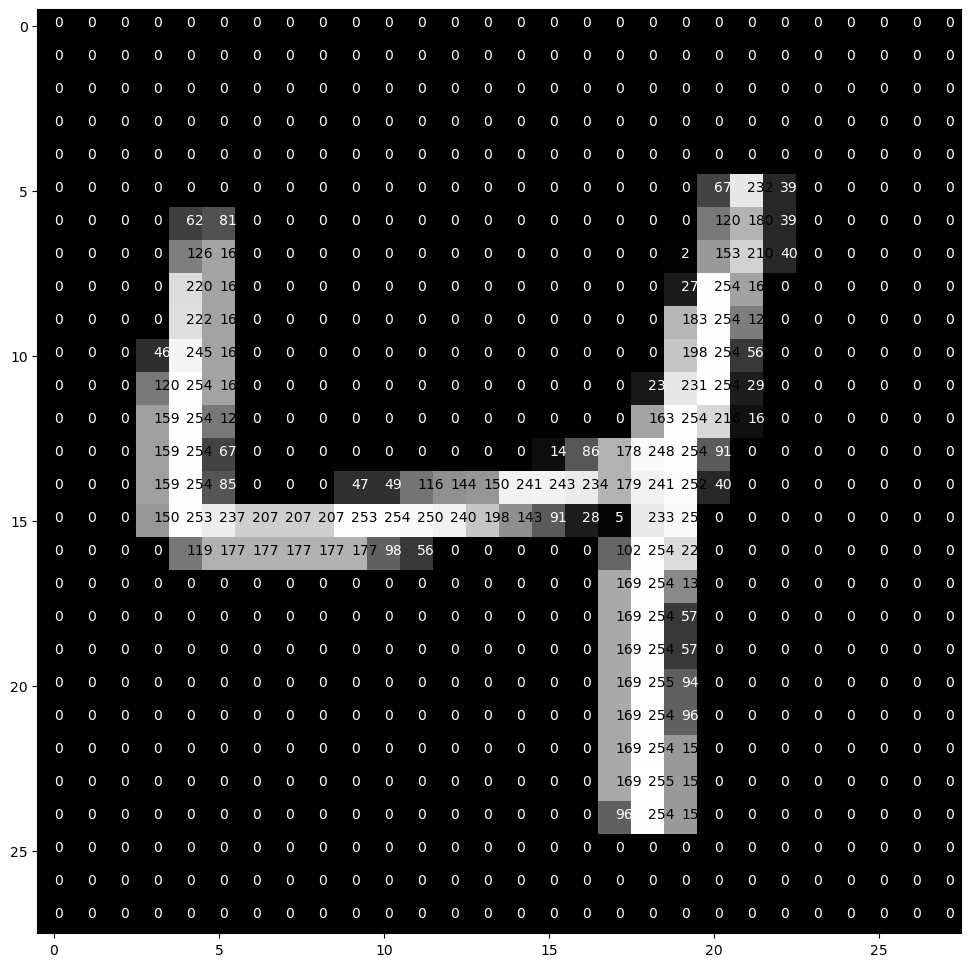

In [74]:
pixel_visualize(x_train[2])

# Veriyi Hazırlama

Encoding
* önce: [0 1 2 3 4 5 6 7 8 9]
* sonra:[0 0 1 0 0 0 0 0 0 0] mesela şu an 2 yi ifade ediyoruz 

In [88]:
y_train[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [89]:
y_train = to_categorical(y_train) # one hot encode..
y_test = to_categorical(y_test)   # one hot encode..

In [90]:
y_train[0:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

Reshaping
* amaç : 28*28 lik resim ve 60 bin gözlem var,  elimizdeki pikselleri ifade etmemiz de lazım

In [91]:
image_size = x_train.shape[1]

In [92]:
image_size

28

In [93]:
x_train.shape

(60000, 28, 28)

In [94]:
x_test.shape

(10000, 28, 28)

In [95]:
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0] , 28,28,1)

In [96]:
x_train.shape

(60000, 28, 28, 1)

Normalizasyon - standartlaştırma
* 0 ile 255 arasında ki değerlerin 0 ile 1 arasına çekmek, öğrenme hızını arttırır

In [97]:
x_train = x_train.astype('float32') / 255

x_test = x_test.astype('float32') / 255

# modelleme

modelin mimarisi

In [117]:
model = tf.keras.Sequential([Flatten(input_shape = (28,28,1)),
                             Dense(units = 128, activation='relu',name='layer1'),
                             Dense(units= num_labels, activation='softmax', name = 'output_layer')])

model.compile(loss ='categorical_crossentropy',
              optimizer = 'adam',
              metrics=[tf.keras.metrics.Precision(),
                       tf.keras.metrics.Recall(),
                       'accuracy'])

In [107]:
?model.compile

Signature:
model.compile(
    optimizer='rmsprop',
    loss=None,
    metrics=None,
    loss_weights=None,
    weighted_metrics=None,
    run_eagerly=None,
    steps_per_execution=None,
    jit_compile=None,
    pss_evaluation_shards=0,
    **kwargs,
)
Docstring:
Configures the model for training.

Example:

```python
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy(),
                       tf.keras.metrics.FalseNegatives()])
```

Args:
    optimizer: String (name of optimizer) or optimizer instance. See
      `tf.keras.optimizers`.
    loss: Loss function. May be a string (name of loss function), or
      a `tf.keras.losses.Loss` instance. See `tf.keras.losses`. A loss
      function is any callable with the signature `loss = fn(y_true,
      y_pred)`, where `y_true` are the ground truth values, and
      `y_pred` are the model's predictions.
      `y_t

In [108]:
?tf.keras.Sequential

Init signature: tf.keras.Sequential(layers=None, name=None)
Docstring:     
`Sequential` groups a linear stack of layers into a `tf.keras.Model`.

`Sequential` provides training and inference features on this model.

Examples:

```python
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(16,)))
model.add(tf.keras.layers.Dense(8))

# Note that you can also omit the initial `Input`.
# In that case the model doesn't have any weights until the first call
# to a training/evaluation method (since it isn't yet built):
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(8))
model.add(tf.keras.layers.Dense(4))
# model.weights not created yet

# Whereas if you specify an `Input`, the model gets built
# continuously as you are adding layers:
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(16,)))
model.add(tf.keras.layers.Dense(4))
len(model.weights)
# Returns "2"

# When using the delayed-build pattern (no input shape specified), you can
# choose to manually bui

In [119]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 layer1 (Dense)              (None, 128)               100480    
                                                                 
 output_layer (Dense)        (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [130]:
model.fit(x_train, y_train, epochs=10 , batch_size = 128, validation_data=(x_test, y_test))

Epoch 1/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0611 - precision_1: 0.9855 - recall: 0.9796 - accuracy: 0.9827 - val_loss: 0.0841 - val_precision_1: 0.9794 - val_recall: 0.9721 - val_accuracy: 0.9748
Epoch 2/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0514 - precision_1: 0.9875 - recall: 0.9824 - accuracy: 0.9850 - val_loss: 0.0796 - val_precision_1: 0.9784 - val_recall: 0.9735 - val_accuracy: 0.9752
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0436 - precision_1: 0.9898 - recall: 0.9856 - accuracy: 0.9877 - val_loss: 0.0744 - val_precision_1: 0.9796 - val_recall: 0.9749 - val_accuracy: 0.9766
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0361 - precision_1: 0.9917 - recall: 0.9883 - accuracy: 0.9901 - val_loss: 0.0795 - val_precision_1: 0.9788 - val_recall: 0.9743 - val_accuracy: 0.9759
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0309 - preci

In [121]:
?model.fit

Signature:
model.fit(
    x=None,
    y=None,
    batch_size=None,
    epochs=1,
    verbose='auto',
    callbacks=None,
    validation_split=0.0,
    validation_data=None,
    shuffle=True,
    class_weight=None,
    sample_weight=None,
    initial_epoch=0,
    steps_per_epoch=None,
    validation_steps=None,
    validation_batch_size=None,
    validation_freq=1,
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False,
)
Docstring:
Trains the model for a fixed number of epochs (dataset iterations).

Args:
    x: Input data. It could be:
      - A Numpy array (or array-like), or a list of arrays
        (in case the model has multiple inputs).
      - A TensorFlow tensor, or a list of tensors
        (in case the model has multiple inputs).
      - A dict mapping input names to the corresponding array/tensors,
        if the model has named inputs.
      - A `tf.data` dataset. Should return a tuple
        of either `(inputs, targets)` or
        `(inputs, targets, sample_w

In [127]:
y_pred = model.predict(x_test)

313/313 [==============================] - 0s 1ms/step


In [131]:
history = model.fit(x_train, y_train, epochs=10 , batch_size = 128, validation_data=(x_test, y_test))

Epoch 1/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0116 - precision_1: 0.9980 - recall: 0.9974 - accuracy: 0.9977 - val_loss: 0.0804 - val_precision_1: 0.9800 - val_recall: 0.9772 - val_accuracy: 0.9782
Epoch 2/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0097 - precision_1: 0.9985 - recall: 0.9980 - accuracy: 0.9983 - val_loss: 0.0788 - val_precision_1: 0.9789 - val_recall: 0.9773 - val_accuracy: 0.9780
Epoch 3/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0099 - precision_1: 0.9979 - recall: 0.9973 - accuracy: 0.9975 - val_loss: 0.0817 - val_precision_1: 0.9790 - val_recall: 0.9769 - val_accuracy: 0.9779
Epoch 4/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0074 - precision_1: 0.9989 - recall: 0.9987 - accuracy: 0.9988 - val_loss: 0.0898 - val_precision_1: 0.9771 - val_recall: 0.9755 - val_accuracy: 0.9760
Epoch 5/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0061 - preci

###################################
# Accuracy ve Loss Grafikleri
############3######################

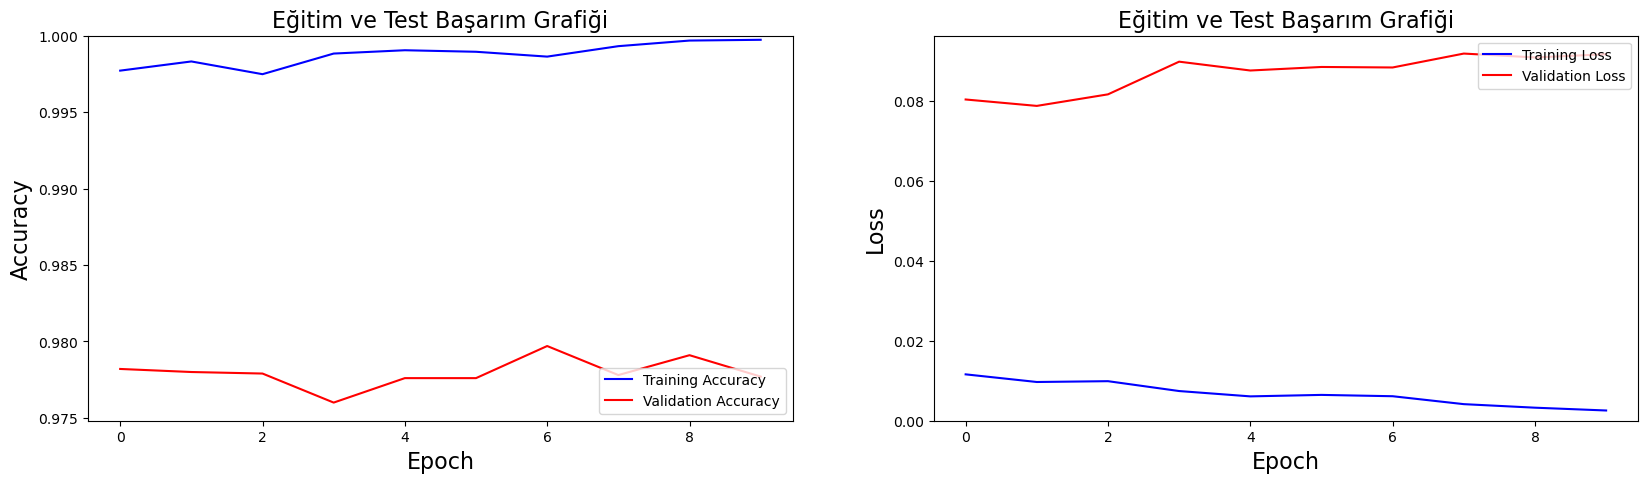

In [137]:
# Graph 1 Accuracy
plt.figure(figsize= (20,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], color='b', label= 'Training Accuracy')
plt.plot(history.history['val_accuracy'], color = 'r', label = 'Validation Accuracy')
plt.legend(loc='lower right')
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.ylim([min(plt.ylim()), 1])
plt.title('Eğitim ve Test Başarım Grafiği', fontsize= 16 )

# Graph 2 Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], color='b', label= 'Training Loss')
plt.plot(history.history['val_loss'], color = 'r', label = 'Validation Loss')
plt.legend(loc='upper right')
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.ylim([0,max(plt.ylim())])
plt.title('Eğitim ve Test Başarım Grafiği', fontsize= 16 )
plt.show()

In [139]:
loss, precision, recall, acc = model.evaluate(x_test,y_test,verbose=False)

In [140]:
print("\nTest Accuracy: %.1f%%" % (100.0 * acc))
print("\nTest Loss: %.1f%%" % (100.0 * loss))
print("\nTest Precision: %.1f%%" % (100.0 * precision))
print("\nTest Recall: %.1f%%" % (100.0 * recall))


Test Accuracy: 97.8%

Test Loss: 9.2%

Test Precision: 97.9%

Test Recall: 97.7%


* Accuracy: Tahminde bulunulduğunda doğru sınıflandırma oranı.  
* Precision : Tahmin ettiklerimizin başarısı.
* Recall : Sınıfların gerçek değerlerinin kaç tanesini doğru tahmin ettik diye bakılıyor.

Deployment

In [141]:
model.save("mnist_model.h5")

C:\Users\ycanf\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [142]:
import random 
random = random.randint(0,x_test.shape[0])

In [143]:
random

6032

In [144]:
test_image = x_test[random]

In [145]:
test_image

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [146]:
y_test[random]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

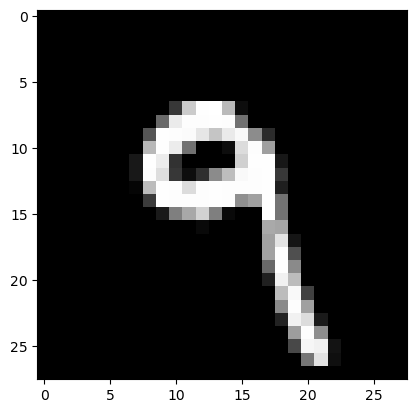

In [147]:
plt.imshow(test_image.reshape(28,28), cmap='gray')

In [149]:
test_data = x_test[random].reshape(1,28,28,1)

In [150]:
probability = model.predict(test_data)

1/1 [==============================] - 0s 29ms/step


In [151]:
probability

array([[3.6374440e-18, 6.9946221e-10, 7.7185962e-15, 9.5759223e-09,
        1.0961587e-08, 5.6881383e-10, 1.2692717e-19, 4.9763321e-10,
        1.1618739e-11, 1.0000000e+00]], dtype=float32)

In [154]:
predicted_classes = np.argmax(probability)

In [155]:
predicted_classes

9

In [156]:
?np.argmax

Signature: np.argmax(a, axis=None, out=None, *, keepdims=<no value>)
Docstring:
Returns the indices of the maximum values along an axis.

Parameters
----------
a : array_like
    Input array.
axis : int, optional
    By default, the index is into the flattened array, otherwise
    along the specified axis.
out : array, optional
    If provided, the result will be inserted into this array. It should
    be of the appropriate shape and dtype.
keepdims : bool, optional
    If this is set to True, the axes which are reduced are left
    in the result as dimensions with size one. With this option,
    the result will broadcast correctly against the array.

    .. versionadded:: 1.22.0

Returns
-------
index_array : ndarray of ints
    Array of indices into the array. It has the same shape as `a.shape`
    with the dimension along `axis` removed. If `keepdims` is set to True,
    then the size of `axis` will be 1 with the resulting array having same
    shape as `a.shape`.

See Also
--------